# Chapter 8: Tree-Based Methods

## Importing the libraries and functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('white')
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

In [2]:
# Print tree function
def print_tree(tree, feature_names, class_names=None, filled=True):
  dot_data = export_graphviz(tree, out_file=None, feature_names=feature_names, class_names=class_names, filled=filled)
  graph = graphviz.Source(dot_data)
  # graph.render()
  return graph

## Fitting Classification Tree

### Importing the dataset

In [3]:
carseats_df = pd.read_csv('data/Carseats.csv', index_col=0).dropna()

In [4]:
carseats_df.shape

(400, 11)

In [5]:
carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
carseats_df['High'] = carseats_df.Sales.map(lambda x: 1 if x > 8 else 0)
carseats_df.ShelveLoc = pd.factorize(carseats_df.ShelveLoc)[0]
carseats_df.Urban = carseats_df.Urban.map({'No': 0, 'Yes': 1})
carseats_df.US = carseats_df.US.map({'No': 0, 'Yes': 1})

In [7]:
carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
1,9.50,138,73,11,276,120,0,42,17,1,1,1
2,11.22,111,48,16,260,83,1,65,10,1,1,1
3,10.06,113,35,10,269,80,2,59,12,1,1,1
4,7.40,117,100,4,466,97,2,55,14,1,1,0
5,4.15,141,64,3,340,128,0,38,13,1,0,0


In [8]:
X = carseats_df.drop(['Sales', 'High'], axis=1)
y = carseats_df.High

### Fitting the decision tree on the whole dataset

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
print(classification_report(y, tree.predict(X)))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       236
           1       0.98      0.82      0.89       164

    accuracy                           0.92       400
   macro avg       0.93      0.90      0.91       400
weighted avg       0.92      0.92      0.92       400



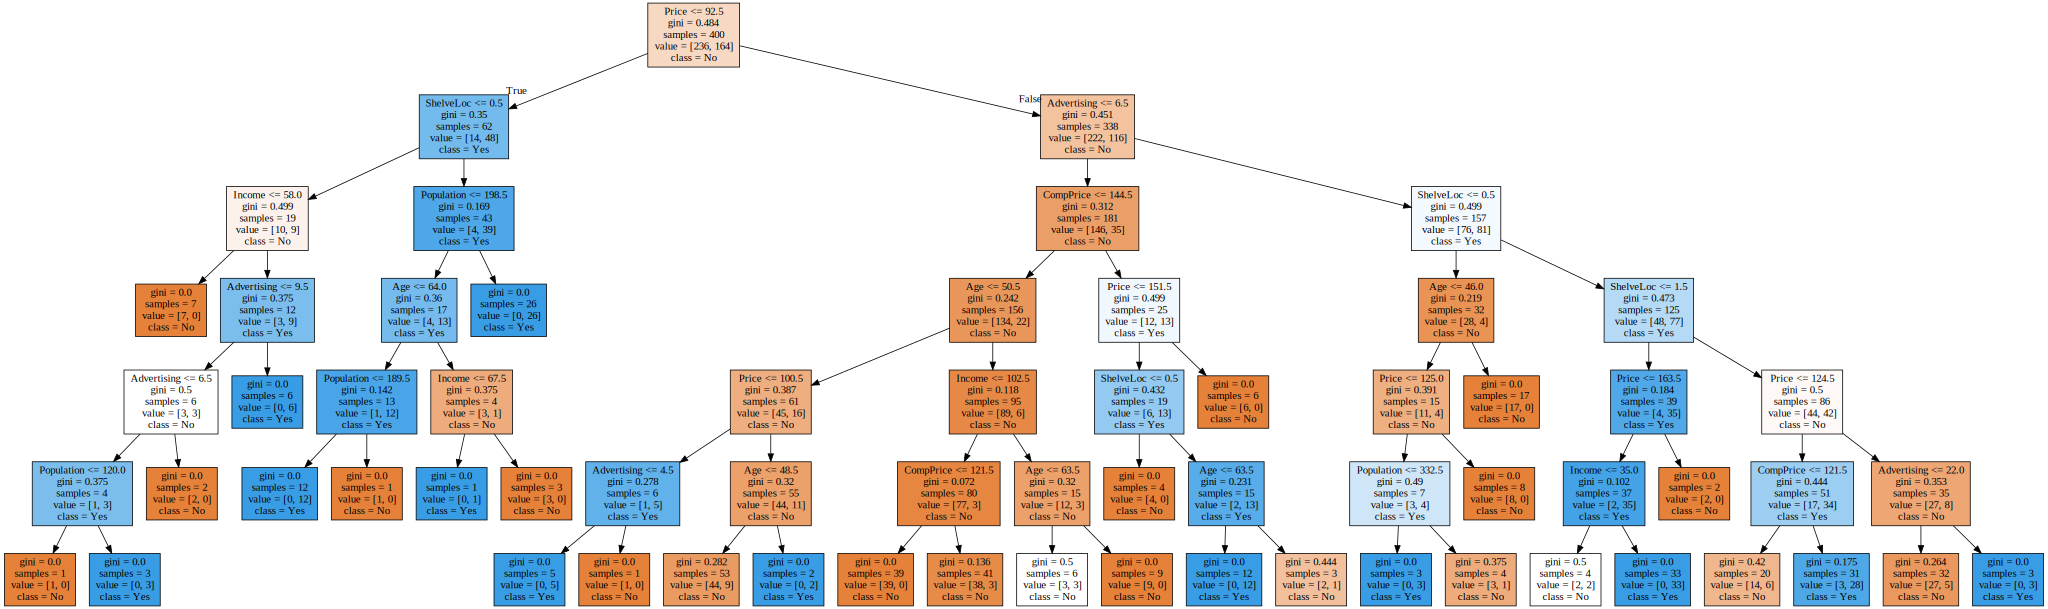

In [12]:
print_tree(tree, feature_names=X.columns, class_names=['No', 'Yes'])

In [13]:
print('Number of terminal nodes: {}'.format(tree.get_n_leaves()))

Number of terminal nodes: 33


### Fitting the decision tree on the training set and evaluate on the test set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [15]:
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [16]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm.T, columns=['No', 'Yes'], index=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,100,32
Yes,18,50


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       118
           1       0.74      0.61      0.67        82

    accuracy                           0.75       200
   macro avg       0.75      0.73      0.73       200
weighted avg       0.75      0.75      0.75       200



## Fitting Regression Trees
### Importing the dataset

In [18]:
boston_df = pd.read_csv('data/Boston.csv')

In [19]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [20]:
X = boston_df.drop('medv', axis=1)
y = boston_df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

### Fitting the decision regression tree

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

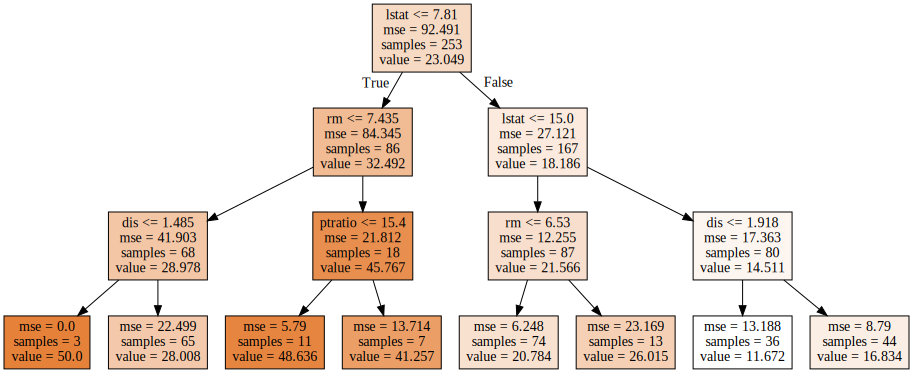

In [23]:
print_tree(regressor, feature_names=X.columns)

Text(0, 0.5, 'True')

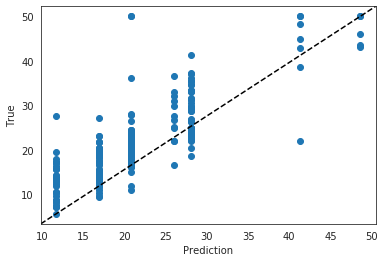

In [24]:
plt.scatter(y_pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('Prediction')
plt.ylabel('True')

In [25]:
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

MSE: 26.023230850097445


## Bagging and Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

### Bagging (random forest with all features)

In [27]:
regressor_1 = RandomForestRegressor(max_features=X.shape[1], random_state=1)
regressor_1.fit(X_train, y_train)

/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=13, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [28]:
y_pred = regressor_1.predict(X_test)

Text(0, 0.5, 'True')

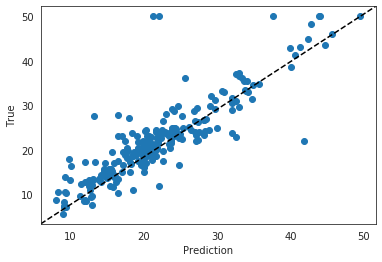

In [29]:
plt.scatter(y_pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('Prediction')
plt.ylabel('True')

In [30]:
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

MSE: 18.290404743083002


### Random forest with 6 features

In [31]:
regressor_2 = RandomForestRegressor(max_features=6, random_state=1)
regressor_2.fit(X_train, y_train)

/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [32]:
y_pred = regressor_2.predict(X_test)
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

MSE: 16.462186166007907


In [33]:
feature_importance = pd.Series(regressor_2.feature_importances_*100, index=X.columns)
feature_importance = feature_importance.sort_values(inplace=False)
feature_importance

zn          0.171087
chas        0.396975
rad         0.683826
indus       1.153757
black       1.286774
age         1.939226
ptratio     2.021025
tax         3.220564
nox         3.905814
crim        5.005037
dis         6.079883
rm         29.125204
lstat      45.010827
dtype: float64

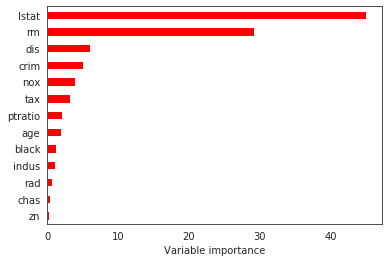

In [34]:
feature_importance.T.plot(kind='barh', color='r')
plt.xlabel('Variable importance')
plt.gca().legend_ = None

## Boosting

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

In [36]:
regressor_3 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
regressor_3.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [37]:
y_pred = regressor_3.predict(X_test)
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

MSE: 15.585284273714013


In [38]:
feature_importance = regressor_3.feature_importances_ * 100
feature_importance = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
feature_importance

zn          0.010346
chas        0.121257
rad         0.150597
black       0.459114
indus       0.497222
nox         0.791744
age         0.880128
tax         1.108479
crim        2.684293
ptratio     4.452571
dis         5.987496
rm         27.934650
lstat      54.922104
dtype: float64

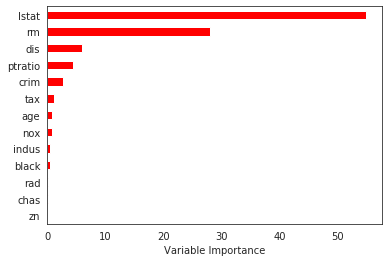

In [39]:
feature_importance.T.plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None